In [106]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [107]:
# load daata
df = pd.read_csv('data.csv')
df.head(3)

,match_id,duration,win_team,score_r,score_d,skill,w1,w2,w3,w4,w5,l1,l2,l3,l4,l5
0,6374093605,3205,0,44,35,NaN,9,71,50,22,46,119,83,21,99,1
1,6374093612,2671,0,47,26,NaN,40,75,22,99,42,105,52,44,11,35
2,6374093615,2172,0,66,40,NaN,84,85,70,10,136,121,120,29,48,101


In [108]:
# Formula to replace unnecessary texts
def replace_text(to_replace,old_text_list,new_text):
    for old_text in old_text_list:
        to_replace = to_replace.replace(old_text,new_text)
    return to_replace

In [109]:
# Hero stat lookup formula
df_heroes = pd.read_csv('hero_stats.csv')[['hero_id','localized_name','roles']]
def herostat(ids,data):
    herostat = {k:v for k,v in zip(df_heroes.hero_id, df_heroes[data])}
    return [herostat[i] for i in ids]

# Make a list of all unique heroes
unique_role = list(np.unique(replace_text(','.join(df_heroes.roles),['[',']','"',"'",' '],'').split(',')))

# Assign primary role types
for r in range(df_heroes.shape[0]):
    df_heroes.loc[r,'roles_list'] = replace_text( ''.join(df_heroes.loc[r,'roles']), ['[',']','"',"'",' '], '').split(',')[0]

# Assign codified primary hero role
for role_type in unique_role:
    df_heroes[role_type] = df_heroes['roles_list'].str.count(role_type)
df_heroes.head(3)

,hero_id,localized_name,roles,roles_list,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support
0,1,Anti-Mage,"['Carry', 'Escape', 'Nuker']",Carry,1,0,0,0,0,0,0,0,0
1,2,Axe,"['Initiator', 'Durable', 'Disabler', 'Jungler'...",Initiator,0,0,0,0,1,0,0,0,0
2,3,Bane,"['Support', 'Disabler', 'Nuker', 'Durable']",Support,0,0,0,0,0,0,0,0,1


In [110]:
# Include winning team's primary hero roles
df['roles_primary'] = ''
for r in range(df.shape[0]):
    # Create a list of dictionaries listing hero names and roles
    role_list = []
    for h in range(6,11):
        hero      = ''.join(herostat([df.iloc[r,h]],'localized_name')) # pull hero name - str
        roles     = replace_text( ','.join(herostat([df.iloc[r,h]],'roles')), ['[',']','"',"'",' '], '').split(',') # pull hero roles - list
        role_dict = {'hero':hero, 'roles':roles }
        role_list.append(role_dict)
    
    # Create an array with all primary roles of each hero
    primary_role_list = []
    for i in range(0,5):
        primary_role_list.append(str(role_list[i]['roles'][0]))
    df.loc[r,'roles_primary'] = str(primary_role_list)
df.head(3)

,match_id,duration,win_team,score_r,score_d,skill,w1,w2,w3,w4,w5,l1,l2,l3,l4,l5,roles_primary
0,6374093605,3205,0,44,35,NaN,9,71,50,22,46,119,83,21,99,1,"['Carry', 'Carry', 'Support', 'Nuker', 'Carry']"
1,6374093612,2671,0,47,26,NaN,40,75,22,99,42,105,52,44,11,35,"['Support', 'Carry', 'Nuker', 'Carry', 'Carry']"
2,6374093615,2172,0,66,40,NaN,84,85,70,10,136,121,120,29,48,101,"['Support', 'Support', 'Carry', 'Carry', 'Supp..."


In [111]:
# Include losing team's primary hero roles
df['roles_primary_l'] = ''
for r in range(df.shape[0]):
    # Create a list of dictionaries listing hero names and roles
    role_list = []
    for h in range(11,16):
        hero      = ''.join(herostat([df.iloc[r,h]],'localized_name')) # pull hero name - str
        roles     = replace_text( ','.join(herostat([df.iloc[r,h]],'roles')), ['[',']','"',"'",' '], '').split(',') # pull hero roles - list
        role_dict = {'hero':hero, 'roles':roles }
        role_list.append(role_dict)
    
    # Create an array with all primary roles of each hero
    primary_role_list = []
    for i in range(0,5):
        primary_role_list.append(str(role_list[i]['roles'][0]))
    df.loc[r,'roles_primary_l'] = str(primary_role_list)
df.head(3)

,match_id,duration,win_team,score_r,score_d,skill,w1,w2,w3,w4,w5,l1,l2,l3,l4,l5,roles_primary,roles_primary_l
0,6374093605,3205,0,44,35,NaN,9,71,50,22,46,119,83,21,99,1,"['Carry', 'Carry', 'Support', 'Nuker', 'Carry']","['Support', 'Support', 'Carry', 'Carry', 'Carry']"
1,6374093612,2671,0,47,26,NaN,40,75,22,99,42,105,52,44,11,35,"['Support', 'Carry', 'Nuker', 'Carry', 'Carry']","['Nuker', 'Carry', 'Carry', 'Carry', 'Carry']"
2,6374093615,2172,0,66,40,NaN,84,85,70,10,136,121,120,29,48,101,"['Support', 'Support', 'Carry', 'Carry', 'Supp...","['Support', 'Carry', 'Initiator', 'Carry', 'Su..."


In [112]:
# Count number of picks for all primary roles
for role_type in unique_role:
    df[role_type+'_pri'] = df['roles_primary'].str.count(role_type)
# Average team composition of winning roles - primary
df1 = df[ [r+'_pri' for r in unique_role] ]
print('Average winning team')
for role in df1.columns:
    print(role + ': ' + '{:.2f}'.format(df1[role].mean()) )

Average winning team
Carry_pri: 2.74
Disabler_pri: 0.21
Durable_pri: 0.04
Escape_pri: 0.05
Initiator_pri: 0.30
Jungler_pri: 0.00
Nuker_pri: 0.16
Pusher_pri: 0.00
Support_pri: 1.50


In [113]:
# Count number of picks for all primary roles in losing team
for role_type in unique_role:
    df[role_type+'_pri_l'] = df['roles_primary_l'].str.count(role_type)
# Average team composition of winning roles - primary
df1 = df[ [r+'_pri_l' for r in unique_role] ]
print('Average losing team')
for role in df1.columns:
    print(role + ': ' + '{:.2f}'.format(df1[role].mean()) )

Average losing team
Carry_pri_l: 2.75
Disabler_pri_l: 0.19
Durable_pri_l: 0.03
Escape_pri_l: 0.05
Initiator_pri_l: 0.33
Jungler_pri_l: 0.00
Nuker_pri_l: 0.17
Pusher_pri_l: 0.00
Support_pri_l: 1.49


In [114]:
# How many heroes are considered a Carry?
print( df_heroes[df_heroes.Carry==1].shape[0] )

64


In [115]:
# Create codified hero presence and outcome (Win/Loss)
for index, row in df_heroes.iterrows():
    hid = row['hero_id']
    df[hid] = df.apply(lambda x: 1 if hid in [x['w1'],x['w2'],x['w3'],x['w4'],x['w5']] else (2 if hid in [x['l1'],x['l2'],x['l3'],x['l4'],x['l5']] else 0), axis=1 ) # assign new columns to show hero presence (0=not present,1=winning team,2=losing team)
df.head(2)

,match_id,duration,win_team,score_r,score_d,skill,w1,w2,w3,w4,...,114,119,120,121,123,126,128,129,135,136
0,6374093605,3205,0,44,35,NaN,9,71,50,22,...,0,2,0,0,0,0,0,0,0,0
1,6374093612,2671,0,47,26,NaN,40,75,22,99,...,0,0,0,0,0,0,0,0,0,0


#### Calculate Hero Pair Stats

In [123]:
# Generate hero pairs and calculate win rate
import itertools
hero_pair = []
for i in range(3):
    hero_pair.append(list(itertools.combinations(list(df_heroes['hero_id']),i)))
hero_pair = pd.DataFrame(hero_pair[2],columns=['hid1','hid2'])
# Map to hero names
hero_pair['hero1'] = herostat(hero_pair['hid1'],'localized_name')
hero_pair['hero2'] = herostat(hero_pair['hid2'],'localized_name')

# Calculate win, lose, total game, & win rate for the given hero pairs
for r in tqdm(range(hero_pair.shape[0])):
    pair = list([hero_pair.loc[r,'hid1'],hero_pair.loc[r,'hid2']])
    h1 = pair[0]
    h2 = pair[1]
    # Calculate win rate by going through match data set row by row
    win_no  = df[(df[h1]==1) & (df[h2]==1)].shape[0]
    lose_no = df[(df[h1]==2) & (df[h2]==2)].shape[0]
    # Add columns with datapoints: win #, lose #, total game #, and win rate %
    hero_pair.loc[r,'win_no'] = win_no
    hero_pair.loc[r,'lose_no'] = lose_no
    hero_pair.loc[r,'game_no'] = win_no + lose_no
    hero_pair.loc[r,'win_rate'] = win_no / (win_no + lose_no) if (win_no + lose_no) != 0 else np.nan
# Save pair results
hero_pair.to_csv('hero_combination_2_new_method.csv',index=False)

C:\Users\ushun\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/7381 [00:00<?, ?it/s]

In [124]:
# Top winning hero pairs
hero_pair = pd.read_csv('hero_combination_2_new_method.csv')
hero_pair.sort_values(by='game_no',ascending=False).head(10)

,hid1,hid2,hero1,hero2,win_no,lose_no,game_no,win_rate
1553,14,74,Pudge,Invoker,27.0,19.0,46.0,0.586957
1505,14,26,Pudge,Lion,23.0,17.0,40.0,0.575000
1523,14,44,Pudge,Phantom Assassin,16.0,24.0,40.0,0.400000
842,8,26,Juggernaut,Lion,27.0,11.0,38.0,0.710526
831,8,14,Juggernaut,Pudge,20.0,18.0,38.0,0.526316
3513,35,84,Sniper,Ogre Magi,27.0,11.0,38.0,0.710526
1518,14,39,Pudge,Queen of Pain,19.0,18.0,37.0,0.513514
1572,14,93,Pudge,Slark,19.0,18.0,37.0,0.513514
23,1,26,Anti-Mage,Lion,17.0,19.0,36.0,0.472222
1549,14,70,Pudge,Ursa,18.0,18.0,36.0,0.500000


In [138]:
# Generate single hero win rate
import itertools
hero_solo = []
for i in range(3):
    hero_solo.append(list(itertools.combinations(list(df_heroes['hero_id']),i)))
hero_solo = pd.DataFrame(hero_solo[1],columns=['hid'])
# Map to hero names
hero_solo['hero'] = herostat(hero_solo['hid'],'localized_name')

# Calculate win rate for the given hero
for r in tqdm(range(hero_solo.shape[0])): # tqdm(range(hero_solo.shape[0]))
    hero = [hero_solo.loc[r,'hid']][0]
    # Calculate win rate by going through match data set row by row
    win_no  = df[df[hero]==1].shape[0]
    lose_no = df[df[hero]==2].shape[0]
    hero_solo.loc[r,'win_no'] = win_no
    hero_solo.loc[r,'lose_no'] = lose_no
    hero_solo.loc[r,'game_no'] = win_no + lose_no
    hero_solo.loc[r,'win_rate'] = win_no / (win_no + lose_no) if (win_no + lose_no) != 0 else np.nan
hero_solo.sort_values(by='win_rate',ascending=False,inplace=True)
# Save hero results
hero_solo.to_csv('hero_combination_1.csv',index=False)

C:\Users\ushun\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/122 [00:00<?, ?it/s]

In [139]:
# Top winning hero pairs
hero_solo = pd.read_csv('hero_combination_1.csv')
hero_solo.sort_values(by='game_no',ascending=False).head(10)
top20_picks = list(hero_solo.sort_values(by='game_no',ascending=False).head(20)['hero'])

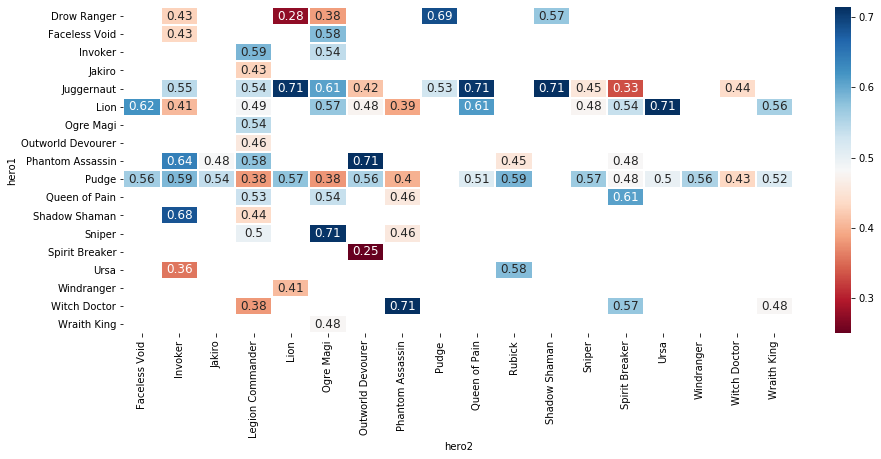

In [149]:
# Create top 20 hero pair heatmap - remove match sample size <= 20
top20_pair = hero_pair[(hero_pair['game_no']>20) & (hero_pair['hero1'].isin(top20_picks)) & (hero_pair['hero2'].isin(top20_picks))].sort_values(by='win_rate',ascending=False)
df_pivot = pd.pivot_table(top20_pair, values='win_rate', index='hero1', columns='hero2')
import seaborn as sns
from matplotlib import pyplot
a4_dims = (15, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(df_pivot, cmap='RdBu',linewidth=1,annot=True,annot_kws={"size": 12});

In [150]:
hero_pair.sort_values(by='game_no',ascending=False).head(10)

,hid1,hid2,hero1,hero2,win_no,lose_no,game_no,win_rate
1553,14,74,Pudge,Invoker,27.0,19.0,46.0,0.586957
1505,14,26,Pudge,Lion,23.0,17.0,40.0,0.575000
1523,14,44,Pudge,Phantom Assassin,16.0,24.0,40.0,0.400000
842,8,26,Juggernaut,Lion,27.0,11.0,38.0,0.710526
831,8,14,Juggernaut,Pudge,20.0,18.0,38.0,0.526316
3513,35,84,Sniper,Ogre Magi,27.0,11.0,38.0,0.710526
1518,14,39,Pudge,Queen of Pain,19.0,18.0,37.0,0.513514
1572,14,93,Pudge,Slark,19.0,18.0,37.0,0.513514
23,1,26,Anti-Mage,Lion,17.0,19.0,36.0,0.472222
1549,14,70,Pudge,Ursa,18.0,18.0,36.0,0.500000


#### Calculate Hero Quad Stats (stopped running due to 8m+ quad combinations and dataset is likely too small to draw meaningful results)

In [162]:
# Generate hero quads combinations
import itertools
hero_quad = []
for i in range(5):
    hero_quad.append(list(itertools.combinations(list(df_heroes['hero_id']),i)))
hero_quad = pd.DataFrame(hero_quad[4],columns=['hid1','hid2','hid3','hid4'])
# Map to hero names
hero_quad['hero1'] = herostat(hero_quad['hid1'],'localized_name')
hero_quad['hero2'] = herostat(hero_quad['hid2'],'localized_name')
hero_quad['hero3'] = herostat(hero_quad['hid3'],'localized_name')
hero_quad['hero4'] = herostat(hero_quad['hid4'],'localized_name')

In [164]:
# Calculate win, lose, total game, & win rate for the given hero quads
for r in tqdm(range(hero_quad.shape[0])):
    quad = list([hero_quad.loc[r,'hid1'],hero_quad.loc[r,'hid2'],hero_quad.loc[r,'hid3'],hero_quad.loc[r,'hid4']])
    h1 = quad[0]
    h2 = quad[1]
    h3 = quad[2]
    h4 = quad[3]
    # Calculate win rate by going through match data set row by row
    win_no  = df[(df[h1]==1) & (df[h2]==1) & (df[h3]==1) & (df[h4]==1)].shape[0]
    lose_no = df[(df[h1]==2) & (df[h2]==2) & (df[h3]==2) & (df[h4]==2)].shape[0]
    # Add columns with datapoints: win #, lose #, total game #, and win rate %
    hero_quad.loc[r,'win_no'] = win_no
    hero_quad.loc[r,'lose_no'] = lose_no
    hero_quad.loc[r,'game_no'] = win_no + lose_no
    hero_quad.loc[r,'win_rate'] = win_no / (win_no + lose_no) if (win_no + lose_no) != 0 else np.nan
# Save pair results
hero_quad.to_csv('hero_combination_4.csv',index=False)

C:\Users\ushun\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/8783390 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [102]:
# (Old Method) Generate hero pairs and calculate win rate
import itertools
hero_pair = []
for i in range(3):
    hero_pair.append(list(itertools.combinations(list(df_heroes['hero_id']),i)))
hero_pair = pd.DataFrame(hero_pair[2],columns=['hid1','hid2'])
# Map to hero names
hero_pair['hero1'] = herostat(hero_pair['hid1'],'localized_name')
hero_pair['hero2'] = herostat(hero_pair['hid2'],'localized_name')

# Calculate win, lose, total game, & win rate for the given hero pairs
for r in tqdm(range(hero_pair.shape[0])):
    pair = list([hero_pair.loc[r,'hid1'],hero_pair.loc[r,'hid2']])
    # Calculate win rate by going through match data set row by row
    win_no  = 0
    lose_no = 0
    for index, row in df.iterrows():
        if (pair[0] in list(row[6:11])) & (pair[1] in list(row[6:11])):
            win_no = win_no + 1
        if (pair[0] in list(row[11:16])) & (pair[1] in list(row[11:16])):
            lose_no = lose_no + 1
    # Add columns with datapoints: win #, lose #, total game #, and win rate %
    hero_pair.loc[r,'win_no'] = win_no
    hero_pair.loc[r,'lose_no'] = lose_no
    hero_pair.loc[r,'game_no'] = win_no + lose_no
    hero_pair.loc[r,'win_rate'] = win_no / (win_no + lose_no) if (win_no + lose_no) != 0 else np.nan
# Save pair results
hero_pair.to_csv('hero_combination_2.csv',index=False)

C:\Users\ushun\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


  0%|          | 0/7381 [00:00<?, ?it/s]

KeyboardInterrupt: 